0.6924247664774021
0.8796977614968137


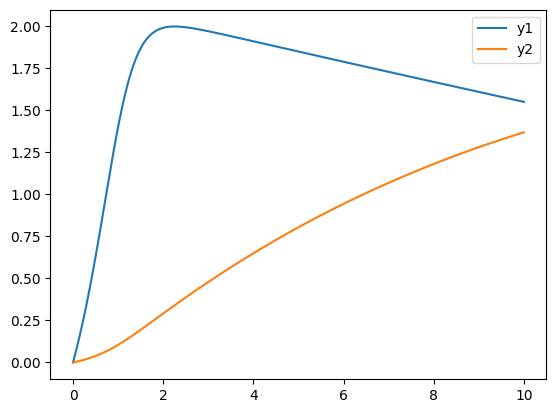

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random

a=random.uniform(0.6, 0.8)
print(a)
b=random.uniform(0.7,0.9)
print(b)
eps=0.08

# Define the system of ODEs
def model(y, t):
    y1, y2 = y
    f1 = y1 - (y1**3)/3 -y2 + 1  # Define the function for dy1/dt
    f2 = eps*(y1+a-b*y2)  # Define the function for dy2/dt
    dydt = [f1, f2]
    return dydt

# Set initial conditions
y0 = [0, 0]

# Set the time points at which to solve the ODEs
t = np.linspace(0, 10, 1000)

# Solve the ODEs
solution = odeint(model, y0, t)

# Extract results for plotting or further analysis
y1_solution, y2_solution = solution[:, 0], solution[:, 1]

# Plot the results if needed
plt.plot(t, y1_solution, label='y1')
plt.plot(t, y2_solution, label='y2')
plt.legend()
plt.show()


0.6935909494177148
0.8191697066501226
Time values: [ 0.    0.01  0.02 ...  9.98  9.99 10.  ]
Solution values:
[[ 0.00000000e+00  0.00000000e+00]
 [ 1.00000000e-02  5.54872760e-04]
 [ 2.00944479e-02  1.11810915e-03]
 ...
 [-5.47239606e-02  2.41737277e+00]
 [-6.94443817e-02  2.41946806e+00]
 [-8.43323897e-02  2.42155294e+00]]


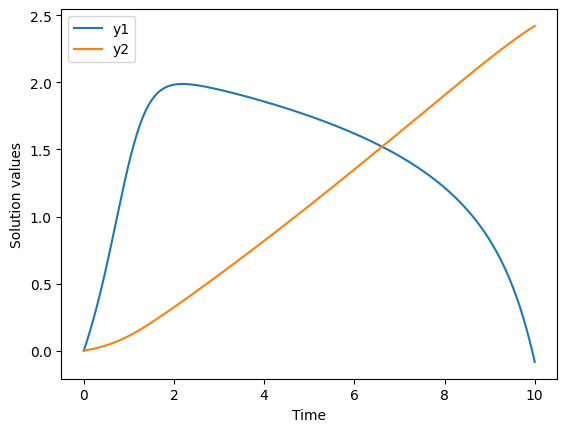

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt


a=random.uniform(0.6, 0.8)
print(a)
b=random.uniform(0.7,0.9)
print(b)
eps=0.08

def forward_euler_system(f, y0, t_span, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    y_values = [y0]

    for t in t_values[:-1]:
        y_next = y_values[-1] + h * np.array(f(t, y_values[-1]))
        y_values.append(y_next)

    return t_values, np.array(y_values)

# Example usage:
# Define the system of ODEs as a function f(t, y)
def f(t, y):
    dy1_dt = y[0] - (y[0]**3)/3 - y[1]+1
    dy2_dt = eps*(y[0] + a + b*y[1])
    return [dy1_dt, dy2_dt]

# Initial values
y0 = [0, 0]

# Time span and step size
t_span = [0, 10]
h = 0.01



# Solve the system using forward Euler
t_values, y_values = forward_euler_system(f, y0, t_span, h)

# Print or plot the results as needed
print("Time values:", t_values)
print("Solution values:")
print(y_values)

plt.plot(t_values, y_values[:, 0], label='y1')
plt.plot(t_values, y_values[:, 1], label='y2')
plt.xlabel('Time')
plt.ylabel('Solution values')
plt.legend()
plt.show()


0.7262821528199097
0.8015494790251481


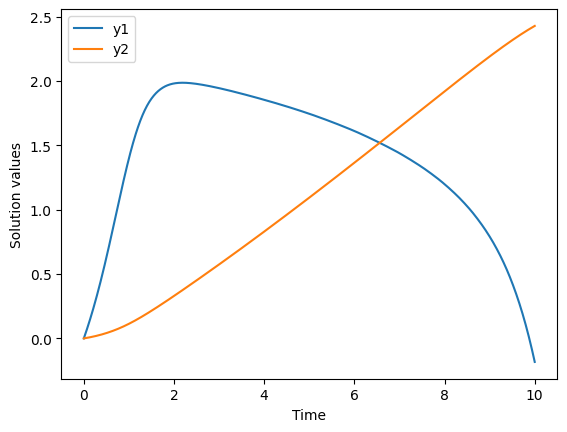

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import random

a=random.uniform(0.6, 0.8)
print(a)
b=random.uniform(0.7,0.9)
print(b)
eps=0.08

# Define the system of ODEs
def f(t, y):
    dy1_dt = y[0] - (y[0]**3)/3 - y[1]+1
    dy2_dt = eps*(y[0] + a + b*y[1])
    return [dy1_dt, dy2_dt]

# Set initial conditions
y0 = [0, 0]

# Set the time points at which to solve the ODEs
t = np.linspace(0, 10, 1000)
t_span=[0,10]


# Solve the ODEs
solution = solve_ivp(f, t_span, y0,'BDF',t)

# Extract results for plotting or further analysis
t_values = solution.t
y_values = solution.y

# Plot the results
plt.plot(t_values, y_values[0], label='y1')
plt.plot(t_values, y_values[1], label='y2')
plt.xlabel('Time')
plt.ylabel('Solution values')
plt.legend()
plt.show()